<a href="https://colab.research.google.com/github/Madhavi-1234/PCA-Breast-Cancer-Analysis/blob/main/Copy_of_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


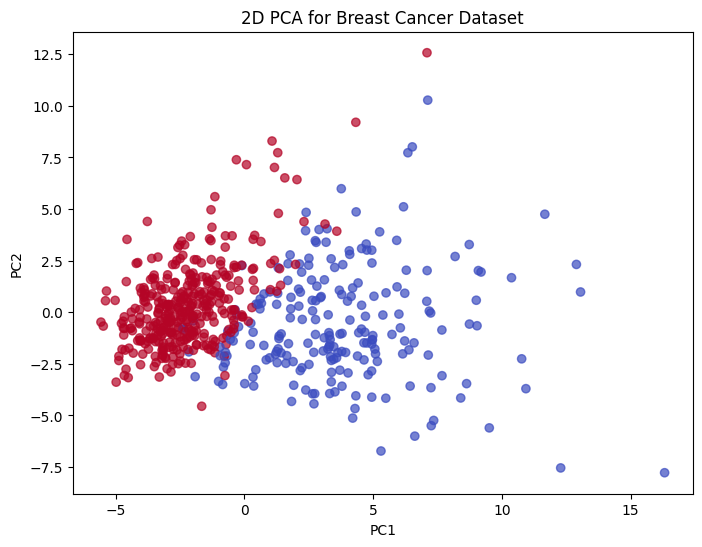

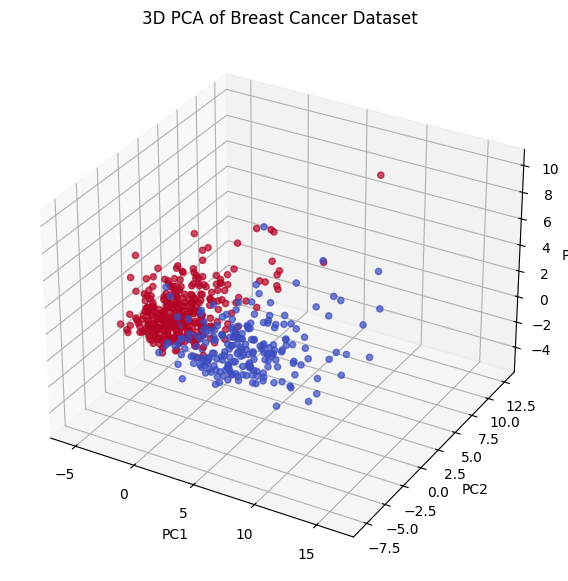

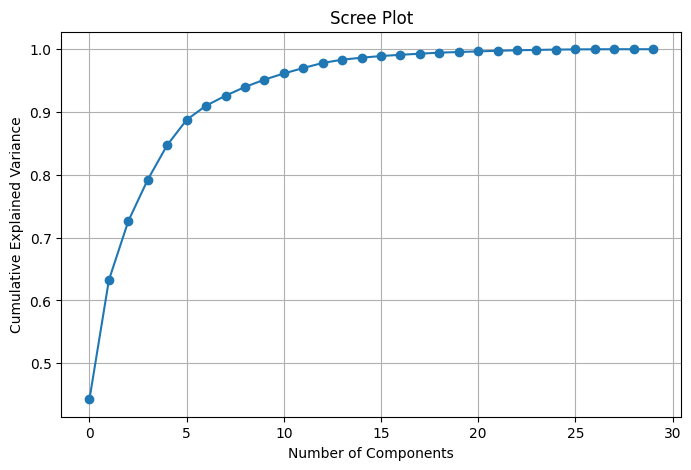

Accuracy on ORIGINAL data:

Logistic Regression : 0.9736842105263158
SVM : 0.9736842105263158
Random Forest : 0.9649122807017544

Accuracy on PCA 2D data:

Logistic Regression : 0.9912280701754386
SVM : 0.9649122807017544
Random Forest : 0.9824561403508771

Accuracy on PCA 3D data:

Logistic Regression : 0.9824561403508771
SVM : 0.9385964912280702
Random Forest : 0.9473684210526315


In [ ]:
data = load_breast_cancer()

X = data.data                     # Features (30 medical measurements)
y = data.target                    # Target (0 = malignant, 1 = benign)
features = data.feature_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)


pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA for Breast Cancer Dataset")
plt.show()

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], c=y, cmap='coolwarm', alpha=0.7)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3D PCA of Breast Cancer Dataset")
plt.show()


pca_all = PCA()
pca_all.fit(X_scaled)


plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_all.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid(True)
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

print("Accuracy on ORIGINAL data:\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name, ":", accuracy_score(y_test, pred))


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca2, y, test_size=0.2, random_state=42)

print("\nAccuracy on PCA 2D data:\n")
for name, model in models.items():
    model.fit(X_train2, y_train2)
    pred = model.predict(X_test2)
    print(name, ":", accuracy_score(y_test2, pred))


X_train3, X_test3, y_train3, y_test3 = train_test_split(X_pca3, y, test_size=0.2, random_state=42)

print("\nAccuracy on PCA 3D data:\n")
for name, model in models.items():
    model.fit(X_train3, y_train3)
    pred = model.predict(X_test3)
    print(name, ":", accuracy_score(y_test3, pred))




In [ ]:
# -----------------------------------------------
# STEP 6: Train a Machine Learning Model on PCA Data
# -----------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(
    X_pca2, y, test_size=0.2, random_state=42
)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy after PCA:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy after PCA: 0.9912280701754386

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [ ]:
# -----------------------------------------------
# STEP 6: Train a Machine Learning Model on PCA Data
# -----------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(
    X_pca3, y, test_size=0.2, random_state=42
)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy after PCA:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy after PCA: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
# -------------------------------------------------
# STEP 7: Train model without PCA (to compare)
# -------------------------------------------------

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model2 = LogisticRegression(max_iter=200)
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)

print("Accuracy BEFORE PCA:", accuracy_score(y_test2, y_pred2))


Accuracy BEFORE PCA: 0.9736842105263158


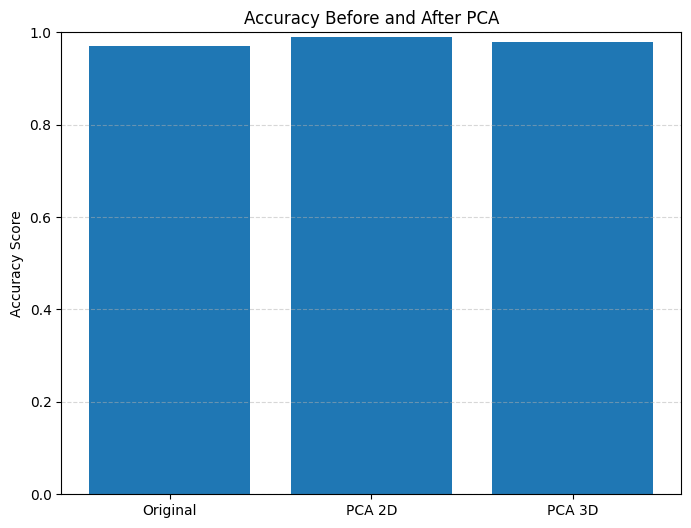

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values from your model results
acc_original = 0.97      # Example: original accuracy
acc_pca2 = 0.99         # Example: PCA 2D accuracy
acc_pca3 = 0.98          # Example: PCA 3D accuracy

# Labels & values
labels = ["Original", "PCA 2D", "PCA 3D"]
accuracies = [acc_original, acc_pca2, acc_pca3]

# Plot bar graph
plt.figure(figsize=(8,6))
plt.bar(labels, accuracies)
plt.ylabel("Accuracy Score")
plt.title("Accuracy Before and After PCA")
plt.ylim(0,1)   # Accuracy is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
